# Начало

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import correlation
import random


df = pd.read_excel('/content/drive/MyDrive/Хакатон DANO 2023/База данных.xlsx')
df.head()

,user_id,sex,age,region,bundle,num_sessions,avg_session,service,order_date,price,...,restaurants,concerts,games,books,theater,sports,beauty,flowers,technology,category
0,1367,M,16,Алтайский край,No bundle,158.0,107.193481,Топливо,2022-12-03,281.52,...,0,0,0,0,0,0,0,0,0,fuel
1,30931,M,17,Московская область,Tinkoff Pro,715.0,83.817278,Кино,2022-11-11,173.68,...,0,0,0,0,0,0,0,0,0,cinema
2,38342,M,16,Республика Башкортостан,Tinkoff Pro,846.0,54.009498,Кино,2022-01-07,183.06,...,0,0,0,0,0,0,0,0,0,cinema
3,23681,M,14,Московская область,No bundle,540.0,329.535396,Вкусвилл,2022-12-28,262.86,...,0,0,0,0,0,0,0,0,0,vkusvill
4,39461,M,17,Воронежская область,No bundle,752.0,49.585118,Вкусвилл,2022-12-18,283.75,...,0,0,0,0,0,0,0,0,0,vkusvill


In [ ]:
# Users that changed their subscription
len(list(filter(lambda x: len(x) == 2 , df.groupby('user_id')['bundle'].unique().to_list())))

601

<Axes: >

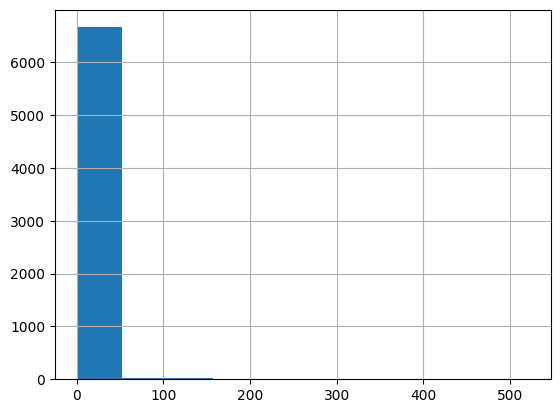

In [ ]:
df.groupby('price')['price'].count().hist()

In [ ]:
df.groupby('bundle')['price'].mean()

bundle
No bundle           729.466968
Tinkoff Premium    4983.811846
Tinkoff Pro         867.328291
Name: price, dtype: float64

In [ ]:
df['service'].unique()

array(['Топливо', 'Кино', 'Вкусвилл', 'Путешествия', 'Рестораны',
       'Концерты', 'Игры', 'Книги', 'Театр', 'Спорт', 'Красота', 'Цветы',
       'Сертификаты', 'Юристы', 'Тренировки', 'Техника', 'Косметика'],
      dtype=object)

In [ ]:
df.groupby('bundle').mean()

<ipython-input-38-49146f0b3a90>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('bundle').mean()


,user_id,age,num_sessions,avg_session,price,fuel,cinema,vkusvill,travel,restaurants,concerts,games,books,theater,sports,beauty,flowers,technology
bundle,,,,,,,,,,,,,,,,,,
No bundle,49897.777393,16.196616,741.431540,89.813088,729.466968,0.178422,0.452044,0.029151,0.178269,0.009836,0.041892,0.052645,0.016308,0.011467,0.005657,0.018703,0.004740,0.000153
Tinkoff Premium,71512.979550,16.742331,1230.966258,158.284402,4983.811846,0.039877,0.086401,0.004090,0.843558,0.002556,0.008691,0.004090,0.001534,0.003579,0.001534,0.002556,0.001534,0.000000
Tinkoff Pro,50171.128540,16.378619,1015.048043,89.965471,867.328291,0.167992,0.463252,0.029908,0.212854,0.006363,0.044225,0.034680,0.014636,0.009227,0.002545,0.008272,0.005091,0.000000


In [ ]:
users = df.groupby('user_id')
users.head()

,user_id,sex,age,region,bundle,num_sessions,avg_session,service,order_date,price,...,restaurants,concerts,games,books,theater,sports,beauty,flowers,technology,category
0,1367,M,16,Алтайский край,No bundle,158.0,107.193481,Топливо,2022-12-03,281.52,...,0,0,0,0,0,0,0,0,0,fuel
1,30931,M,17,Московская область,Tinkoff Pro,715.0,83.817278,Кино,2022-11-11,173.68,...,0,0,0,0,0,0,0,0,0,cinema
2,38342,M,16,Республика Башкортостан,Tinkoff Pro,846.0,54.009498,Кино,2022-01-07,183.06,...,0,0,0,0,0,0,0,0,0,cinema
3,23681,M,14,Московская область,No bundle,540.0,329.535396,Вкусвилл,2022-12-28,262.86,...,0,0,0,0,0,0,0,0,0,vkusvill
4,39461,M,17,Воронежская область,No bundle,752.0,49.585118,Вкусвилл,2022-12-18,283.75,...,0,0,0,0,0,0,0,0,0,vkusvill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24711,24611,M,15,Краснодарский край,Tinkoff Pro,1264.0,62.140398,Спорт,2022-09-27,328.58,...,0,0,0,0,0,1,0,0,0,sports
24714,49060,M,14,Севастополь,No bundle,6.0,794.454333,Кино,2022-11-20,82.14,...,0,0,0,0,0,0,0,0,0,cinema
24715,34290,F,16,Москва,Tinkoff Pro,529.0,72.052841,Кино,2022-02-21,159.59,...,0,0,0,0,0,0,0,0,0,cinema
24717,17235,F,17,Санкт-Петербург,No bundle,349.0,58.275960,Путешествия,2022-11-25,1725.03,...,0,0,0,0,0,0,0,0,0,travel


In [52]:
df.service.unique()

array(['Топливо', 'Кино', 'Вкусвилл', 'Путешествия', 'Концерты', 'Игры',
       'Рестораны', 'Книги', 'Театр', 'Спорт', 'Цветы', 'Сертификаты',
       'Юристы', 'Тренировки', 'Техника', 'Косметика'], dtype=object)

In [73]:
users = pd.DataFrame(df.groupby('user_id').())
users.filter(items=[82385], axis=0)

,sex,age,region,bundle,num_sessions,avg_session,service,order_date,price,fuel,...,restaurants,concerts,games,books,theater,sports,beauty,flowers,technology,category
user_id,,,,,,,,,,,,,,,,,,,,,
82385,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084,...,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084


In [75]:
df[df.user_id==82385].price.sum()

7113945.17

# Информация о датасете

Можно показать эту информцию до и потом после удаления выбрасов и т.д. (у меня пока нет очищенного датасета)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24721 entries, 0 to 24720
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       24721 non-null  int64  
 1   sex           23999 non-null  object 
 2   age           24721 non-null  int64  
 3   region        24721 non-null  object 
 4   bundle        24721 non-null  object 
 5   num_sessions  24154 non-null  float64
 6   avg_session   24154 non-null  float64
 7   service       24721 non-null  object 
 8   order_date    24721 non-null  object 
 9   price         24721 non-null  float64
 10  fuel          24721 non-null  int64  
 11  cinema        24721 non-null  int64  
 12  vkusvill      24721 non-null  int64  
 13  travel        24721 non-null  int64  
 14  restaurants   24721 non-null  int64  
 15  concerts      24721 non-null  int64  
 16  games         24721 non-null  int64  
 17  books         24721 non-null  int64  
 18  theater       24721 non-nu

In [ ]:
df.shape

(24721, 24)

# Корреляции

Корреляция между возрастом и средней ценой услуги:

In [ ]:
correlation(df['age'], df['price'])

0.10116252305658614

Корреляция между возрастом и средней продолжительностью сессии:

In [ ]:
correlation(df[df['avg_session'] != 0]['age'], df[df['avg_session'] != 0]['avg_session'])

nan

Корреляции между видами услуг (отрицательные, так как обычно заказывают всего 1 раз, поэтому после первой покупки другие уже вряд ли будут):

In [ ]:
df_users = df.groupby('user_id').count()['price'].to_frame()
ls = df_users[df_users['price'] > 0].index.to_list()

df[[x in ls for x in df['user_id']]][['fuel', 'cinema', 'vkusvill', 'travel', 'restaurants', 'concerts', 'games', 'books', 'theater', 'sports', 'beauty', 'flowers', 'technology']].corr()

,fuel,cinema,vkusvill,travel,restaurants,concerts,games,books,theater,sports,beauty,flowers,technology
fuel,1.000000,-0.383381,-0.074728,-0.247602,-0.042102,-0.090591,-0.098592,-0.054945,-0.046108,-0.031434,-0.057097,-0.030112,-0.004917
cinema,-0.383381,1.000000,-0.143797,-0.476456,-0.081016,-0.174322,-0.189719,-0.105729,-0.088724,-0.060488,-0.109871,-0.057944,-0.009462
vkusvill,-0.074728,-0.143797,1.000000,-0.092869,-0.015791,-0.033978,-0.036979,-0.020608,-0.017294,-0.011790,-0.021416,-0.011294,-0.001844
travel,-0.247602,-0.476456,-0.092869,1.000000,-0.052323,-0.112583,-0.122527,-0.068284,-0.057301,-0.039066,-0.070959,-0.037423,-0.006111
restaurants,-0.042102,-0.081016,-0.015791,-0.052323,1.000000,-0.019143,-0.020834,-0.011611,-0.009743,-0.006643,-0.012066,-0.006363,-0.001039
concerts,-0.090591,-0.174322,-0.033978,-0.112583,-0.019143,1.000000,-0.044829,-0.024983,-0.020965,-0.014293,-0.025962,-0.013692,-0.002236
games,-0.098592,-0.189719,-0.036979,-0.122527,-0.020834,-0.044829,1.000000,-0.027190,-0.022817,-0.015555,-0.028255,-0.014901,-0.002433
books,-0.054945,-0.105729,-0.020608,-0.068284,-0.011611,-0.024983,-0.027190,1.000000,-0.012716,-0.008669,-0.015746,-0.008304,-0.001356
theater,-0.046108,-0.088724,-0.017294,-0.057301,-0.009743,-0.020965,-0.022817,-0.012716,1.000000,-0.007275,-0.013214,-0.006969,-0.001138
sports,-0.031434,-0.060488,-0.011790,-0.039066,-0.006643,-0.014293,-0.015555,-0.008669,-0.007275,1.000000,-0.009009,-0.004751,-0.000776


Корреляция между регионом (пронумерованы с 0 до 81 вкл.) и средним `price`

In [ ]:
len(df['region'].unique())

82

In [ ]:
df.replace(dict((df['region'].unique()[i], i) for i in range(82)), inplace=True)
df.head()

,user_id,sex,age,region,bundle,num_sessions,avg_session,service,order_date,price,...,restaurants,concerts,games,books,theater,sports,beauty,flowers,technology,category
0,1367,M,16,0,No bundle,158.0,107.193481,Топливо,2022-12-03,281.52,...,0,0,0,0,0,0,0,0,0,fuel
1,30931,M,17,1,Tinkoff Pro,715.0,83.817278,Кино,2022-11-11,173.68,...,0,0,0,0,0,0,0,0,0,cinema
2,38342,M,16,2,Tinkoff Pro,846.0,54.009498,Кино,2022-01-07,183.06,...,0,0,0,0,0,0,0,0,0,cinema
3,23681,M,14,1,No bundle,540.0,329.535396,Вкусвилл,2022-12-28,262.86,...,0,0,0,0,0,0,0,0,0,vkusvill
4,39461,M,17,3,No bundle,752.0,49.585118,Вкусвилл,2022-12-18,283.75,...,0,0,0,0,0,0,0,0,0,vkusvill


In [ ]:
df['region'].corr(df['price'])

-0.07723388275539135